### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import dlib

### Initialize dlib library's face detector and create dlib library's facial landmark predictor

In [2]:
# detect any front looking face
frontal_face_detector = dlib.get_frontal_face_detector()

In [3]:
# loading the pre-trained model
frontal_face_predictor = dlib.shape_predictor("../dataset/shape_predictor_68_face_landmarks.dat")

### Reading and Understanding Images

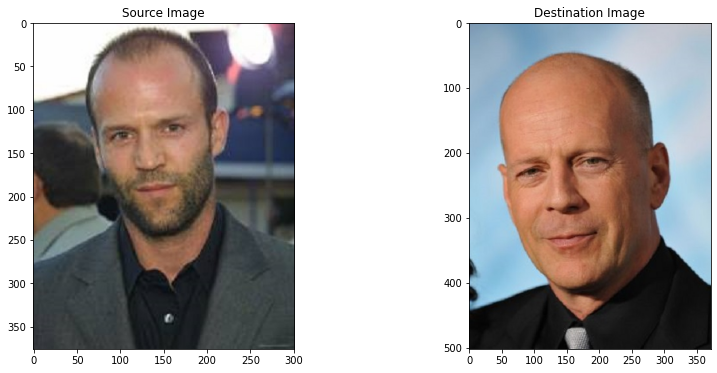

In [4]:
# read the source face image
source_image = cv2.imread("../images/jason.jpg")
source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)
source_image_grayscale = cv2.imread("../images/jason.jpg", 0)

# read the destination face image 
destination_image = cv2.imread("../images/brucewills.jpg")
destination_image = cv2.cvtColor(destination_image, cv2.COLOR_BGR2RGB)
destination_image_grayscale = cv2.imread("../images/brucewills.jpg", 0)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Source Image')
plt.imshow(source_image)

plt.subplot(1,2,2)
plt.title('Destination Image')
plt.imshow(destination_image);

In [5]:
# create a zeros array canvas exactly like the same size of source_image_grayscale
source_image_canvas = np.zeros_like(source_image_grayscale)
source_image_result_3_canvas = np.zeros_like(source_image_grayscale)

# getting the shape of destination_image
height, width, no_of_channels = destination_image.shape

# create a zeros array canvas like the destination image
destination_image_canvas = np.zeros((height,width,no_of_channels),np.uint8)

In [6]:
# define a method to get the index
def index_from_array(numpyarray):
    index = None
    for n in numpyarray[0]:
        index = n
        break
    return index

### FOR THE SOURCE IMAGE

In [7]:
source_image_result_1 = source_image.copy()
source_image_result_2 = source_image.copy()
source_image_result_3 = source_image.copy()
source_image_result_4 = source_image.copy()

In [8]:
# Find the faces in source image (returns a numpy array containing a histogram of pixels in the image)
source_faces = frontal_face_detector(source_image_result_1)

		Result-1


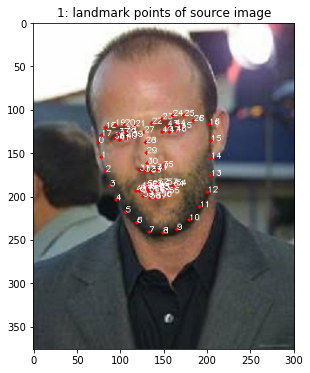

In [9]:
# loop through all faces found in the source image
for source_face in source_faces:
    
    # predictor takes human face as input and returns the list of facial landmarks
    source_face_landmarks = frontal_face_predictor(source_image_result_1, source_face)
    source_face_landmark_points = []
    
    # loop through all the 68 landmark points and add them into a tuple
    for landmark_no in range(0,68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))
        
        # drawing circle on the source_result_1 image
        cv2.circle(source_image_result_1,(x_point,y_point),2,(255,0,0),-1)
        cv2.putText(source_image_result_1, str(landmark_no), (x_point,y_point), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,255))
    
    print('\t\tResult-1')
    plt.figure(figsize=(12,6))
    plt.title('1: landmark points of source image')
    plt.imshow(source_image_result_1)

In [10]:
source_faces = frontal_face_detector(source_image_result_2)

		Result-2


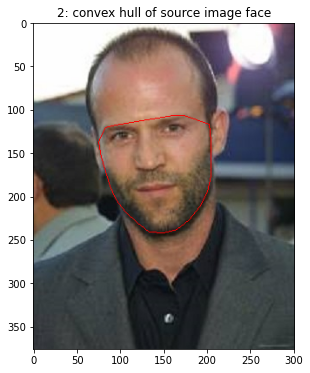

In [11]:
for source_face in source_faces:

    source_face_landmarks = frontal_face_predictor(source_image_result_2, source_face)
    source_face_landmark_points = []
    
    for landmark_no in range(0,68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))

    # converting the points into a numpy array
    source_face_landmark_points_array = np.array(source_face_landmark_points,np.int32)
    
    # find the convex hull of the face (contour points)
    source_face_convexhull = cv2.convexHull(source_face_landmark_points_array)
    
    # drawing line on points for displaying
    cv2.polylines(source_image_result_2, [source_face_convexhull], True, (255,0,0),1)
    
    print('\t\tResult-2')
    plt.figure(figsize=(12,6))
    plt.title("2: convex hull of source image face")
    plt.imshow(source_image_result_2)

In [12]:
source_faces = frontal_face_detector(source_image_result_3)

		Result-3


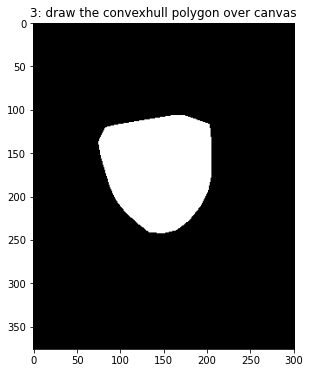

In [13]:
for source_face in source_faces:

    source_face_landmarks = frontal_face_predictor(source_image_result_3, source_face)
    source_face_landmark_points = []
    
    for landmark_no in range(0,68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))

    source_face_landmark_points_array = np.array(source_face_landmark_points,np.int32)
    source_face_convexhull = cv2.convexHull(source_face_landmark_points_array)
    
    # draw a filled polygon over the zero array canvas of source
    cv2.fillConvexPoly(source_image_result_3_canvas, source_face_convexhull, 255)
    
    print('\t\tResult-3')
    plt.figure(figsize=(12,6))
    plt.title("3: draw the convexhull polygon over canvas")
    plt.imshow(source_image_result_3_canvas,cmap='gray')

In [14]:
source_faces = frontal_face_detector(source_image_result_4)

		Result-4


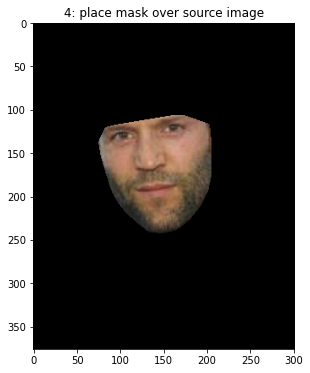

In [15]:
for source_face in source_faces:

    source_face_landmarks = frontal_face_predictor(source_image_result_4, source_face)
    source_face_landmark_points = []
    
    for landmark_no in range(0,68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))

    source_face_landmark_points_array = np.array(source_face_landmark_points,np.int32)
    source_face_convexhull = cv2.convexHull(source_face_landmark_points_array)
    
    # draw a filled polygon over the zero array canvas of source
    cv2.fillConvexPoly(source_image_result_3_canvas, source_face_convexhull, 255)
    
    # place the created mask over the source image
    source_face_image_res_4 = cv2.bitwise_and(source_image_result_4 ,source_image_result_4 ,mask=source_image_result_3_canvas)
    
    print('\t\tResult-4')
    plt.figure(figsize=(12,6))
    plt.title("4: place mask over source image")
    plt.imshow(source_face_image_res_4)

		Result-5


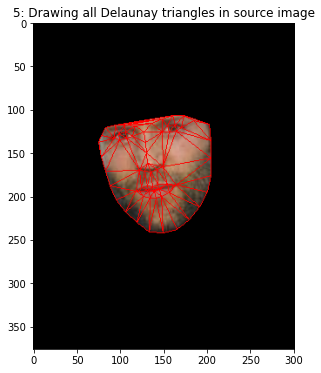

In [16]:
for source_face in source_faces:

    source_face_landmarks = frontal_face_predictor(source_image_result_4, source_face)
    source_face_landmark_points = []
    
    for landmark_no in range(0,68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))

    source_face_landmark_points_array = np.array(source_face_landmark_points,np.int32)
    source_face_convexhull = cv2.convexHull(source_face_landmark_points_array)
    
    cv2.fillConvexPoly(source_image_result_3_canvas, source_face_convexhull, 255)
    
    source_face_image_res_4 = cv2.bitwise_and(source_image_result_4 ,source_image_result_4 ,mask=source_image_result_3_canvas)
    
    ##------------------------------------Delaunay Triangulation of Source Image-------------------------------------------##
    
    # Drawing an approximate bounding rectangle around the face convex hull
    bounding_rectangle = cv2.boundingRect(source_face_convexhull)

    # create an empty Delaunay subdivision
    subdivisions = cv2.Subdiv2D(bounding_rectangle)
    
    # insert the face landmark points into subdivisions
    subdivisions.insert(source_face_landmark_points)
    
    # will return triangles list as 6 numbered vectors
    triangles_vector = subdivisions.getTriangleList()
    
    # convert vector into numpy array
    triangles_array = np.array(triangles_vector,dtype=np.int32)
    
    source_triangle_index_points_list = []
    
    for triangle in triangles_array:
        index_point1 = (triangle[0], triangle[1])
        index_point2 = (triangle[2], triangle[3])
        index_point3 = (triangle[4], triangle[5])
        
        line_color = (255,0,0)
        cv2.line(source_face_image_res_4, index_point1, index_point2, line_color, 1 )
        cv2.line(source_face_image_res_4, index_point2, index_point3, line_color, 1 )
        cv2.line(source_face_image_res_4, index_point3, index_point1, line_color, 1 )
        
        # convert the co-ordinates into facial landmark references
        index_point1 = np.where((source_face_landmark_points_array == index_point1).all(axis=1))
        index_point1 = index_from_array(index_point1)
        index_point2 = np.where((source_face_landmark_points_array == index_point2).all(axis=1))
        index_point2 = index_from_array(index_point2)
        index_point3 = np.where((source_face_landmark_points_array == index_point3).all(axis=1))
        index_point3 = index_from_array(index_point3)
        
        triangle = [index_point1, index_point2, index_point3]
        source_triangle_index_points_list.append(triangle)
    
    # print(source_triangle_index_points_list)
    print('\t\tResult-5')
    plt.figure(figsize=(12,6))
    plt.title("5: Drawing all Delaunay triangles in source image")
    plt.imshow(source_face_image_res_4) 

## FOR THE DESTINATION IMAGE

In [17]:
destination_image_result_1 = destination_image.copy()
destination_image_result_2 = destination_image.copy()

In [18]:
destination_faces = frontal_face_detector(destination_image_result_1)

		Result-1


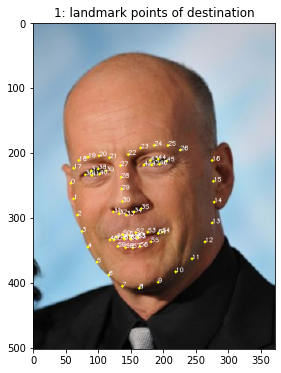

In [19]:
# loop through all faces found in the destination image
for destination_face in destination_faces:
    
    # predictor takes human face as input and returns the list of facial landmarks
    destination_face_landmarks = frontal_face_predictor(destination_image_result_1, destination_face)
    destination_face_landmark_points = []
    
    # loop through all the 68 landmark points and add them into a tuple
    for landmark_no in range(0,68):
        x_point = destination_face_landmarks.part(landmark_no).x
        y_point = destination_face_landmarks.part(landmark_no).y
        destination_face_landmark_points.append((x_point, y_point))
        
        # drawing circle on destination_result_1
        cv2.circle(destination_image_result_1,(x_point,y_point),2,(255,255,0),-1)
        cv2.putText(destination_image_result_1, str(landmark_no),(x_point,y_point), cv2.FONT_HERSHEY_SIMPLEX, .3, (255,255,255))
        
    print('\t\tResult-1')
    plt.figure(figsize=(12,6))
    plt.title('1: landmark points of destination')
    plt.imshow(destination_image_result_1)

In [20]:
destination_faces = frontal_face_detector(destination_image_result_2)

		Result-2


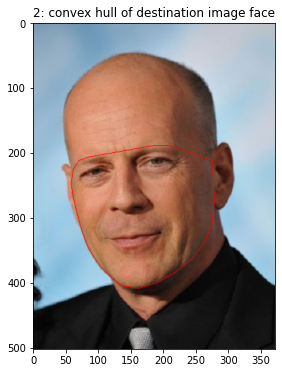

In [21]:
for destination_face in destination_faces:
    
    destination_face_landmarks = frontal_face_predictor(destination_image_result_2, destination_face)
    destination_face_landmark_points = []
    
    for landmark_no in range(0,68):
        x_point = destination_face_landmarks.part(landmark_no).x
        y_point = destination_face_landmarks.part(landmark_no).y
        destination_face_landmark_points.append((x_point, y_point))
        
    # converting the points into a numpy array
    destination_face_landmark_points_array = np.array(destination_face_landmark_points,np.int32)
    
    # find the convex hull of the face, the contour points
    destination_face_convexhull = cv2.convexHull(destination_face_landmark_points_array)
    
    # drawing line on points for displaying
    cv2.polylines(destination_image_result_2, [destination_face_convexhull], True, (255,0,0),1)

    print('\t\tResult-2')
    plt.figure(figsize=(12,6))
    plt.title("2: convex hull of destination image face")
    plt.imshow(destination_image_result_2)

In [22]:
for i, triangle_index_points in enumerate(source_triangle_index_points_list):
    
    #---for every source triangle from the list of triangles, crop the bounding rectangle and extract only triangle points----#
    
    # get x and y coordinates of the vertices
    source_triangle_point1 = source_face_landmark_points[triangle_index_points[0]]
    source_triangle_point2 = source_face_landmark_points[triangle_index_points[1]]
    source_triangle_point3 = source_face_landmark_points[triangle_index_points[2]]
    
    # combining the three points into a numpy array
    source_triangle = np.array([source_triangle_point1,source_triangle_point2,source_triangle_point3], np.int32)
    
    # draw bounding rectangle around the triangle points and crop it for later use
    source_rectangle = cv2.boundingRect(source_triangle)
    (x,y,w,h) = source_rectangle
    cropped_source_rectangle = source_image_result_4[y:y+h, x:x+w]
    
    # remove rectangle points and keep the triangle points only for later use
    source_triangle_points = np.array([[source_triangle_point1[0] - x, source_triangle_point1[1] - y],
                                       [source_triangle_point2[0] - x, source_triangle_point2[1] - y],
                                       [source_triangle_point3[0] - x, source_triangle_point3[1]- y]], np.int32)
    
    
    #----------------------for every destination triangle from the list of triangles-----------------------------------------#
    #----------------------extract only triangle points and create a mask with the triangle----------------------------------#
    
    # get x and y coordinates of the vertices
    destination_triangle_point1 = destination_face_landmark_points[triangle_index_points[0]]
    destination_triangle_point2 = destination_face_landmark_points[triangle_index_points[1]]
    destination_triangle_point3 = destination_face_landmark_points[triangle_index_points[2]]
    
    destination_triangle = np.array([destination_triangle_point1, destination_triangle_point2,
                                     destination_triangle_point3], np.int32)
    
    # Draw Bounding Rectangle around the triangle
    destination_rectangle = cv2.boundingRect(destination_triangle)
    (x, y, w, h) = destination_rectangle
    
    # crop destination rectangle and create a mask for later use        
    cropped_destination_rectangle = source_image_result_4[h,w]
    cropped_destination_rectangle_mask = np.zeros((h, w), np.uint8)
    
    # remove the rectangle points to obtain only the triangle points for later use
    destination_triangle_points = np.array([[destination_triangle_point1[0] - x, destination_triangle_point1[1] - y],
                       [destination_triangle_point2[0] - x, destination_triangle_point2[1] - y],
                       [destination_triangle_point3[0] - x, destination_triangle_point3[1] - y]], np.int32)
    
    # triangle points over the cropped rectangle zero array mask
    cv2.fillConvexPoly(cropped_destination_rectangle_mask, destination_triangle_points, 255)
    
    
    #------warp source triangles to match the destination triangle shape and place destination triangle mask over it---------#
    
    # converting to numpy array
    source_triangle_points = np.float32(source_triangle_points)
    destination_triangle_points = np.float32(destination_triangle_points)
    
    # creating the transformation matrix for warp affine method
    Matrix = cv2.getAffineTransform(source_triangle_points, destination_triangle_points)
    
    # creating the warped triangle
    warped_triangle = cv2.warpAffine(cropped_source_rectangle, Matrix, (w,h))
    
    # placing destination rectangle mask over the warped triangle
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_destination_rectangle_mask)
    
    
    ###-------------Reconstructing destination face in an empty canvas the size of destination image-----------------------###
    
    ## steps to cut off the white lines in the triangle using a mask
    # small rectangular slice of destination canvas in the shape of warped rectange
    new_dest_face_canvas_area = destination_image_canvas[y: y+h, x: x+w]
    
    # convert the new small canvas to grayscale
    new_dest_face_canvas_area_gray = cv2.cvtColor(new_dest_face_canvas_area, cv2.COLOR_BGR2GRAY)
    
    # creating a mask to cut the pixels inside triangle excluding the white lines
    _, mask_created_triangle = cv2.threshold(new_dest_face_canvas_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    
    # placing the mask created
    wraped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask = mask_created_triangle)
    
    # place the masked triangle inside the small canvas area
    new_dest_face_canvas_area = cv2.add(new_dest_face_canvas_area, wraped_triangle)
    
    # place the new small canvas with triangle in it to the large destination canvas at the designated location
    destination_image_canvas[y: y+h, x: x+w] = new_dest_face_canvas_area
    
    # plt.title('completed destination canvas')
    # plt.imshow(destination_image_canvas)

**Swap by Masking the Destination face and placing the newly created face**

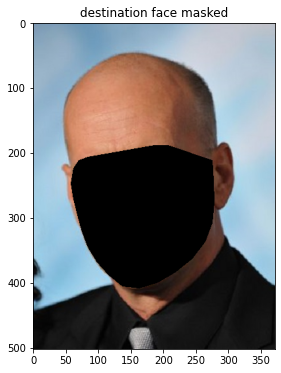

In [23]:
# create a new canvas for final image in exactly the same size of destination image
final_destination_canvas = np.zeros_like(destination_image_grayscale)

# create the destination face mask
final_destination_face_mask = cv2.fillConvexPoly(final_destination_canvas, destination_face_convexhull, 255)

# invert the face mask color
final_destination_canvas = cv2.bitwise_not(final_destination_face_mask)

# mask destination face
destination_face_masked = cv2.bitwise_and(destination_image, destination_image, mask=final_destination_canvas)  

plt.figure(figsize=(12,6))
plt.title('destination face masked')
plt.imshow(destination_face_masked);

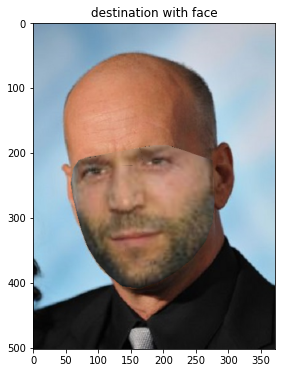

In [24]:
# place new face into destination image
destination_with_face = cv2.add(destination_face_masked,destination_image_canvas)

plt.figure(figsize=(12,6))
plt.title('destination with face')
plt.imshow(destination_with_face);

**Do seamless clone to make the attachment blend with the sorrounding pixels**

In [25]:
# finding the center point of the destination covex hull
(x,y,w,h) = cv2.boundingRect(destination_face_convexhull)  
destination_face_center_point = (int((x+x+w)/2), int((y+y+h)/2))
destination_face_center_point

(168, 299)

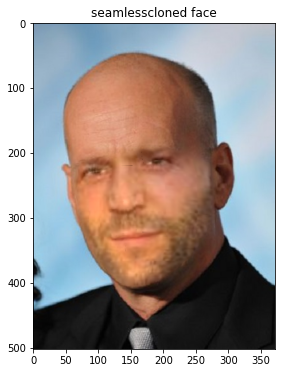

In [26]:
# seamless clone   
seamlesscloned_face = cv2.seamlessClone(destination_with_face, destination_image, final_destination_face_mask, 
                                        destination_face_center_point, cv2.NORMAL_CLONE)

plt.figure(figsize=(12,6))
plt.title('seamlesscloned face')
plt.imshow(seamlesscloned_face);

### Result

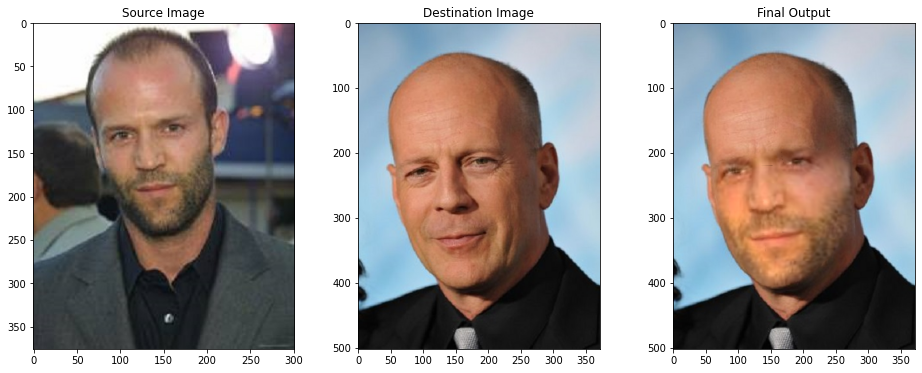

In [27]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
plt.title('Source Image')
plt.imshow(source_image)

plt.subplot(1,3,2)
plt.title('Destination Image')
plt.imshow(destination_image)

plt.subplot(1,3,3)
plt.title('Final Output')
plt.imshow(seamlesscloned_face);